# **PROYEK AKHIR: IMAGE CLASSIFICATION MODEL DEPLOYMENT**
#### Nama: Muhammad Adin Palimbani
#### Email: madinpalimbani09@gmail.com
#### Github: adinplb

# STEP 1: IMPORT LIBRARY


In [31]:
'''
import pandas as pd
from pandas import DataFrame

#library to extract files
import os
import zipfile
import shutil
import PIL

#library to display images
%matplotlib inline
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#library to using image generator
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from google.colab import files
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop

from google.colab import drive
drive.mount('/content/drive/')
'''

import numpy as np
import tensorflow as tf
from tensorflow import keras
import zipfile
import os
import seaborn as sns
import matplotlib.pyplot as plt
import random
from shutil import copyfile
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# STEP 2: IMPORT DATASET AND EXTRACT ZIP FILE

In [32]:
# unzipping files

local_zip = '/content/drive/MyDrive/pengembangan-ML-dicoding/Deployment ML Dicoding/archive.zip' #copy path
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./tmp/') #create tmp for split new folder
zip_ref.close()


# STEP 3: CREATE A FOLDER FOR COVID IMAGE DATA

In [33]:
covid_folder = os.path.join('/content/tmp/COVID')

len_covid_folder = len(os.listdir(covid_folder))
print("Total covid pictures:", len_covid_folder)

covid = os.listdir(covid_folder)
print("5 data in the covid folder:")
i = 0
covid_temp = []
for file_covid in covid[:5]:
    covid_temp.append(file_covid)
    i = i + 1
data_covid = {'File Name': covid_temp}
df_covid = pd.DataFrame(data_covid, index=[1, 2, 3, 4, 5])
df_covid.head()

Total covid pictures: 1626
5 data in the covid folder:


,File Name
1,COVID_90.png
2,COVID_1542.png
3,COVID_563.png
4,COVID_1609.png
5,COVID_532.png


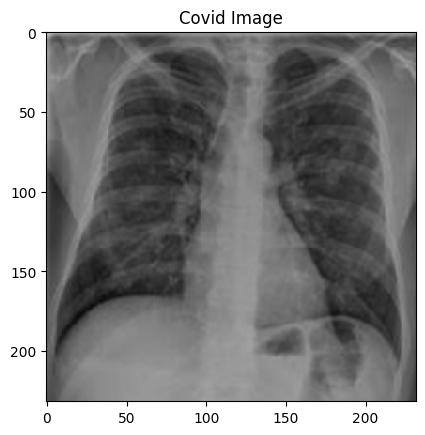

In [34]:
image_covid_path = os.path.join(covid_folder, 'COVID_487.png')
image_covid = image.load_img(image_covid_path)
image_covid_plot = plt.imshow(image_covid)
plt.title('Covid Image')
plt.show()

# STEP 4: CREATE A FOLDER FOR NORMAL IMAGE DATA

In [35]:
normal_folder = os.path.join('/content/tmp/NORMAL')

len_normal_folder = len(os.listdir(normal_folder))
print("Total normal pictures:", len_normal_folder)

normal = os.listdir(normal_folder)
print("5 data in the covid folder:")
i = 0
normal_temp = []
for file_normal in normal[:5]:
    normal_temp.append(file_normal)
    i = i + 1
data_normal = {'File Name': normal_temp}
df_normal = pd.DataFrame(data_normal, index=[1, 2, 3, 4, 5])
df_normal.head()

Total normal pictures: 1802
5 data in the covid folder:


,File Name
1,NORMAL_448.png
2,NORMAL_136.png
3,NORMAL_240.png
4,NORMAL_4.png
5,NORMAL_1452.png


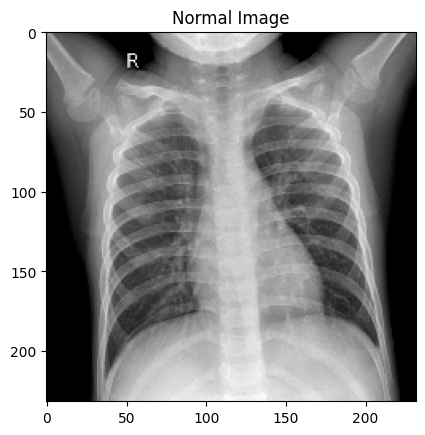

In [36]:
image_normal_path = os.path.join(normal_folder, 'NORMAL_448.png')
image_normal = image.load_img(image_normal_path)
image_normal_plot = plt.imshow(image_normal)
plt.title('Normal Image')
plt.show()

# STEP 5: CREATE A FOLDER FOR PNEUMONIA IMAGE DATA

In [37]:
pneumonia_folder = os.path.join('/content/tmp/PNEUMONIA')

len_pneumonia_folder = len(os.listdir(pneumonia_folder))
print("Total pneumonia pictures:", len_pneumonia_folder)

pneumonia = os.listdir(pneumonia_folder)
print("5 data in the pneumonia folder:")
i = 0
pneumonia_temp = []
for file_pneumonia in pneumonia[:5]:
    pneumonia_temp.append(file_pneumonia)
    i = i + 1
data_pneumonia = {'File Name': pneumonia_temp}
df_pneumonia = pd.DataFrame(data_pneumonia, index=[1, 2, 3, 4, 5])
df_pneumonia.head()

Total pneumonia pictures: 1800
5 data in the pneumonia folder:


,File Name
1,PNEUMONIA_67.png
2,PNEUMONIA_1767.png
3,PNEUMONIA_147.png
4,PNEUMONIA_841.png
5,PNEUMONIA_1211.png


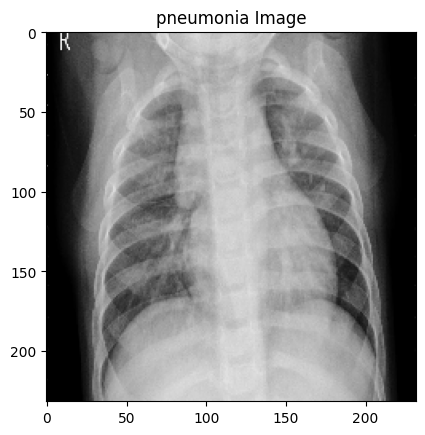

In [38]:
image_pneumonia_path = os.path.join(pneumonia_folder, 'PNEUMONIA_1211.png')
image_pneumonia = image.load_img(image_pneumonia_path)
image_pneumonia_plot = plt.imshow(image_pneumonia)
plt.title('pneumonia Image')
plt.show()

# STEP 6: IMAGE AUGMENTATION USING IMAGE DATA GENERATOR

In [39]:
train_dir = os.path.join("/content/tmp")

In [40]:
train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=20,
                horizontal_flip=True,
                shear_range=0.2,
                zoom_range=0.2,
                fill_mode = 'nearest',
                validation_split=0.2)

In [41]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=40,
        class_mode='categorical',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=40,
        class_mode='categorical',
        subset='validation')

Found 4183 images belonging to 3 classes.
Found 1045 images belonging to 3 classes.


# STEP 7: CREATE MODEL USING SEQUENTIAL + CONV2D MAXPOOLING LAYER

In [43]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax') #depends on total of classes in our dataset
])


optimizer = tf.keras.optimizers.Adam(learning_rate=1.0000e-04)
model.compile(loss = 'categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 36, 36, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_3 (Dropout)         (None, 36, 36, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 64)       

In [44]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>=0.92 or logs.get('val_accuracy')>=0.92):
      print("\nAccuracy or Validation Accuracy has reached 0.92")
      self.model.stop_training = True
callbacks = myCallback()

history = train_models = model.fit(
      train_generator,
      batch_size=64,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=5,
      callbacks=[callbacks]

)

Epoch 1/100
105/105 [==============================] - 51s 450ms/step - loss: 0.8130 - accuracy: 0.6232 - val_loss: 0.5694 - val_accuracy: 0.7800
Epoch 2/100
105/105 [==============================] - 35s 329ms/step - loss: 0.5950 - accuracy: 0.7315 - val_loss: 0.5202 - val_accuracy: 0.8300
Epoch 3/100
105/105 [==============================] - 35s 333ms/step - loss: 0.5145 - accuracy: 0.7832 - val_loss: 0.5011 - val_accuracy: 0.8600
Epoch 4/100
105/105 [==============================] - 35s 333ms/step - loss: 0.4626 - accuracy: 0.8186 - val_loss: 0.4409 - val_accuracy: 0.8300
Epoch 5/100
105/105 [==============================] - 36s 341ms/step - loss: 0.4298 - accuracy: 0.8272 - val_loss: 0.4228 - val_accuracy: 0.8900
Epoch 6/100
105/105 [==============================] - 35s 335ms/step - loss: 0.3977 - accuracy: 0.8451 - val_loss: 0.3679 - val_accuracy: 0.9000
Epoch 7/100
105/105 [==============================] - 37s 350ms/step - loss: 0.3675 - accuracy: 0.8525 - val_loss: 0.3800 -

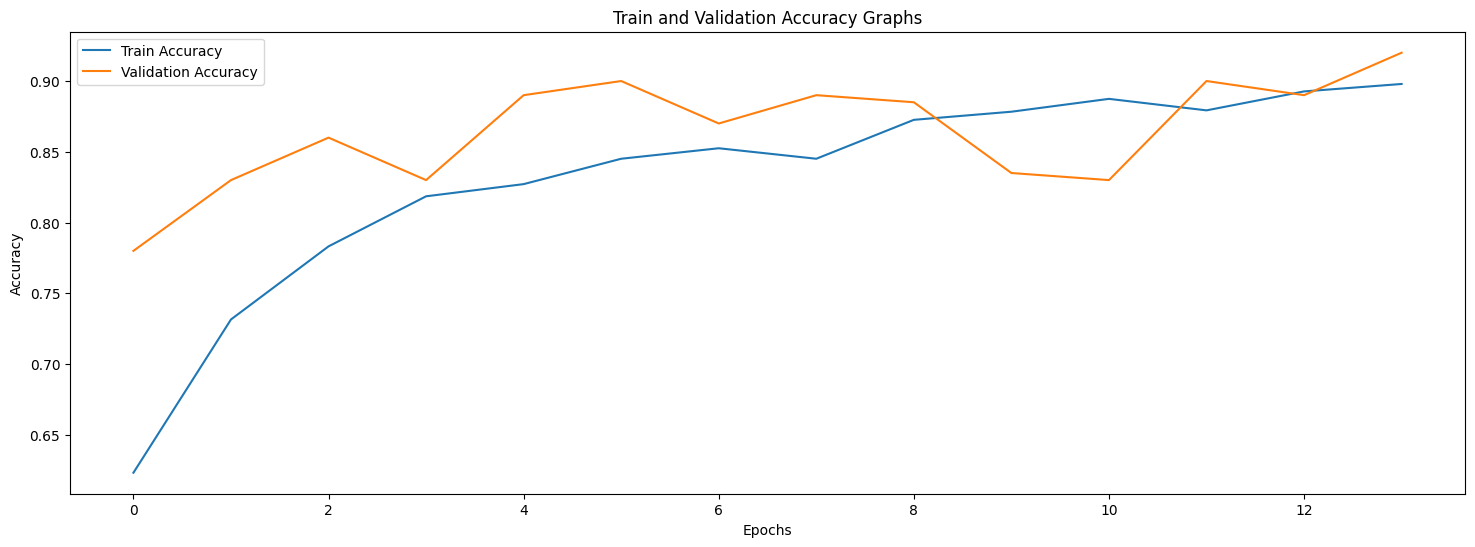

In [45]:
plt.figure(figsize=(18, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train and Validation Accuracy Graphs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

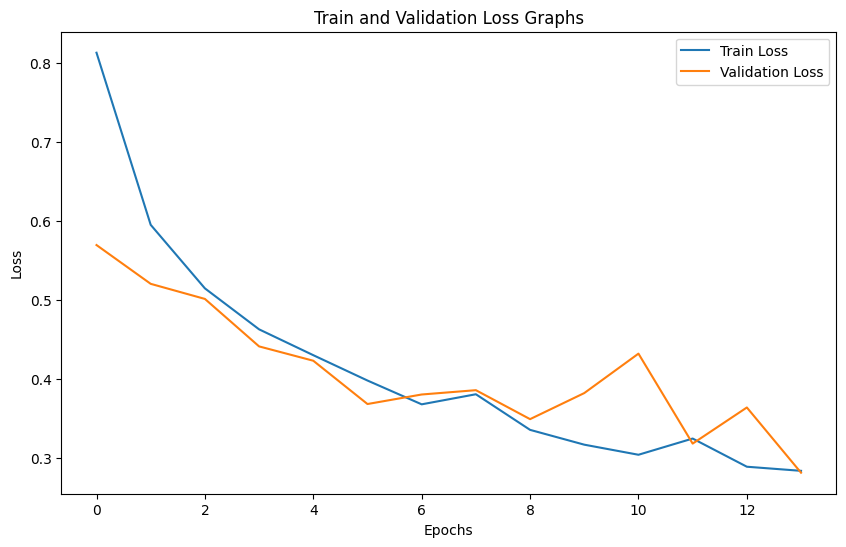

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation Loss Graphs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

Saving PNEUMONIA_12.png to PNEUMONIA_12.png
1/1 [==============================] - 0s 356ms/step
PNEUMONIA_12.png
Result : Pneumonia


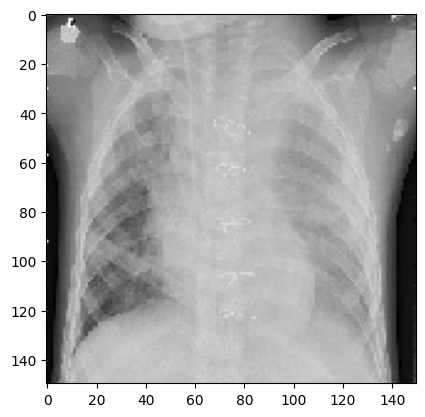

In [48]:
uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size =(150,150)) # target size harus sama dengan di model sebelumnya yaitu 150 150
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  result = model.predict(images, batch_size=10)

  print(fn)
  if result[0,0]!=0:
    print('Result : Covid')
  elif result[0,1]!=0:
    print('Result : Normal')
  elif result[0,2]!=0:
    print('Result : Pneumonia')
  else:
    print('unknown image')

# CONVERT MODEL

In [49]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [50]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)